In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

In [2]:
img = cv2.imread('figs/lena.png',cv2.IMREAD_GRAYSCALE)

In [3]:
# Método da biblioteca cedida pela professor Navar M. M. Nascimento (IFCE)
# Cria variavel do tipo struct (similar ao matlab):
Filter = nf.structtype()
Filter.img = np.array(img)
Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape
Filter.multiLimiar = np.array([80, 120])
Filter.multiRange = np.array([127])

numAp = 1
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

In [4]:
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k, :, :] = nf.multiLimiar(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1, :, :]
        U[k, :, :] = nf.multiLimiar(Filter)
        print(U[k, :, :])

################################
Process finished
Multilimiar have been applied
################################
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [255. 255. 255. ... 127. 127. 127.]
 [255. 255. 255. ... 127. 127. 127.]
 [255. 255. 255. ... 127. 127. 127.]]


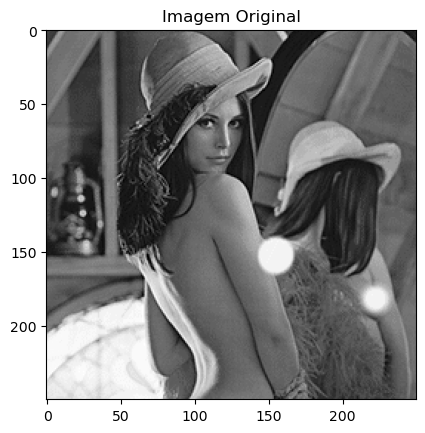

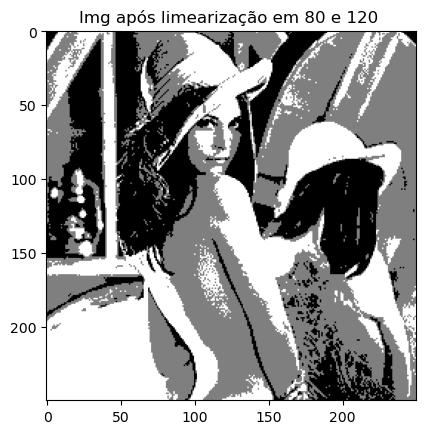

In [5]:
########## Plot images:

########## Using matplotlib #################
plt.figure(1)
#plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Imagem Original')

#plt.subplot(122)
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Img após limearização em %d e %d ' % (Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

In [6]:
def multiLimiar (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    if Filter.multiLimiar.size == 2:
        T2 = Filter.multiLimiar[1]
        T1 = Filter.multiLimiar[0]
        Gmin = 0
        Gmed = Filter.multiRange[0]
        Gmax = 255

    if Filter.multiLimiar.size == 3:
        T3 = Filter.multiLimiar[2]
        T2 = Filter.multiLimiar[1]
        T1 = Filter.multiLimiar[0]
        Gmin = 0
        Gmed1 = Filter.multiRange[0]
        Gmed2 = Filter.multiRange[1]
        Gmax = 255
    #################### Limiar


    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            if Filter.multiLimiar.size == 3:
                if A[j, k] > T3:
                    D[j, k] = Gmax
                elif A[j,k] <= T3 and A[j, k] > T2:
                    D[j, k] = Gmed2
                elif A[j, k] <= T2 and A[j, k] > T1:
                    D[j, k] = Gmed1
                elif A[j,k] <= T1:
                    D[j, k] = Gmin

            if Filter.multiLimiar.size == 2:
                if A[j, k] > T2:
                    D[j, k] = Gmax
                elif A[j,k] <= T2 and A[j, k] > T1:
                    D[j, k] = Gmed
                elif A[j,k] <= T1:
                    D[j, k] = Gmin

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Multilimiar have been applied')
    print('################################')

    return D

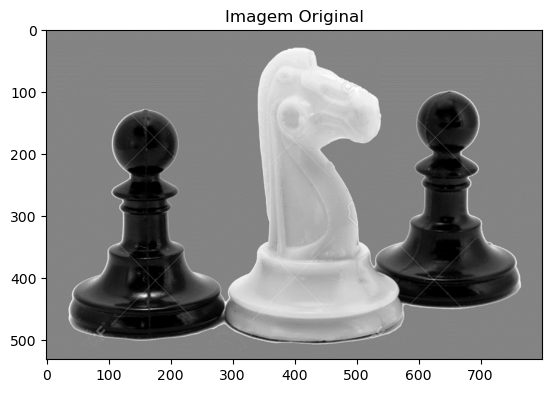

In [8]:
img2 = cv2.imread('figs/xadrez.png',cv2.IMREAD_GRAYSCALE)

plt.figure(1)
#plt.subplot(121)
plt.imshow(img2, 'gray')
plt.title('Imagem Original')
plt.show()

################################
Process finished
Histogram has been calculated
################################


ValueError: x and y must have same first dimension, but have shapes (256,) and (1,)

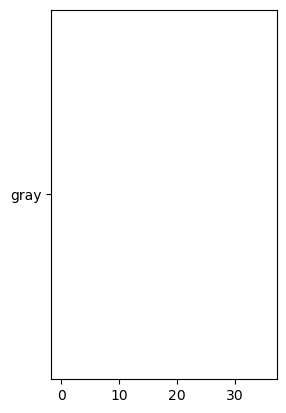

In [9]:
Filter.img = img2

Hist1 = nf.calcHist(Filter.img)

plt.figure(1)
#plt.subplot(121)
plt.stem(Hist1, 'gray')
plt.title('Histograma da Imagem Original')
plt.show()

################################
Process finished
Multilimiar have been applied
################################


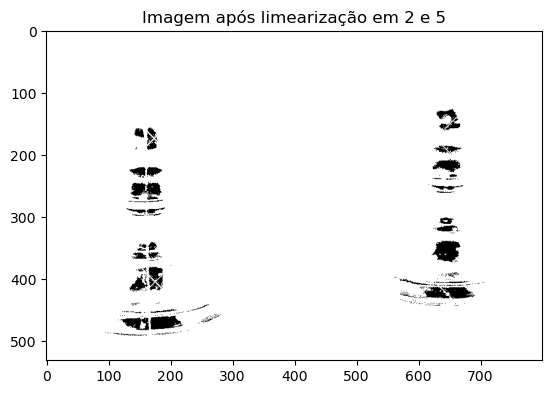

In [10]:
Filter.multiLimiar = np.array([2, 5])
Filter.multiRange = np.array([127])

Saida = nf.multiLimiar(Filter)

plt.figure(1)
plt.imshow(Saida, vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

################################
Process finished
Multilimiar have been applied
################################


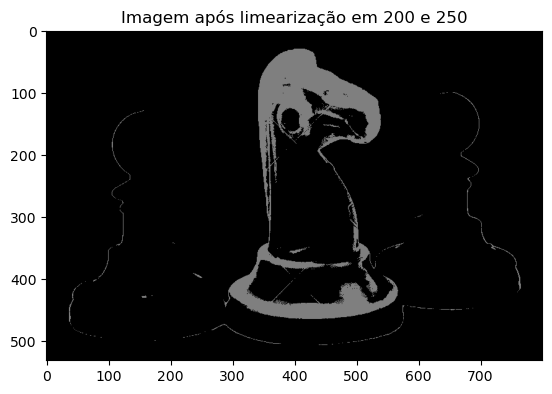

In [11]:
Filter.multiLimiar = np.array([200, 250])
Filter.multiRange = np.array([127])

Saida = nf.multiLimiar(Filter)

plt.imshow(Saida, vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

################################
Process finished
Multilimiar have been applied
################################


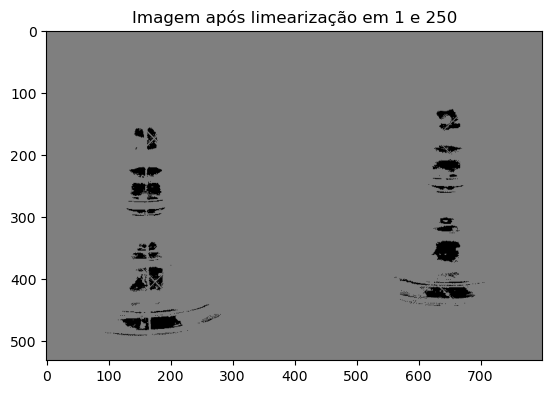

In [12]:
Filter.multiLimiar = np.array([1, 250])
Filter.multiRange = np.array([127])

Saida = nf.multiLimiar(Filter)

plt.imshow(Saida, vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()